In [1]:
import geopandas as gpd
import pandas as pd

In [2]:
a1 = gpd.read_file('Switzerland_adm_shape/s_f1_ad.json')
a2 = gpd.read_file('Switzerland_adm_shape/s_f2_ad.json')
a3 = gpd.read_file('Switzerland_adm_shape/s_f3_ad.json')

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

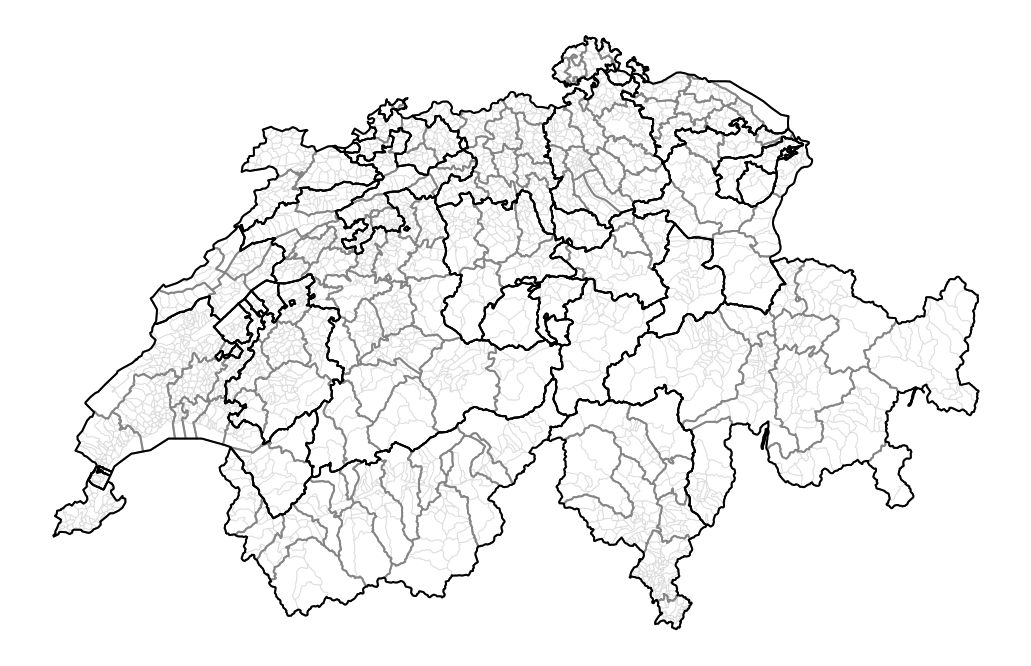

In [4]:
fig, ax = plt.subplots(figsize=(20, 12))

a1.boundary.plot(linewidth = 2, ax = ax, zorder =3, edgecolor = 'black', alpha=1)
a2.boundary.plot(linewidth = 2, ax = ax, zorder =2, edgecolor = 'gray', alpha=0.75)
a3.boundary.plot(linewidth = 1, ax = ax, zorder =1, edgecolor = 'lightgray', alpha=0.5)


ax.axis('off')
plt.show()

In [5]:
a = gpd.read_file('CA_GeoDataFrame.geojson')
boundary = gpd.read_file('Switzerland_adm_shape/s_boundary.json')
boundary = boundary.to_crs('epsg:3035')

In [6]:
a.crs == boundary.crs

True

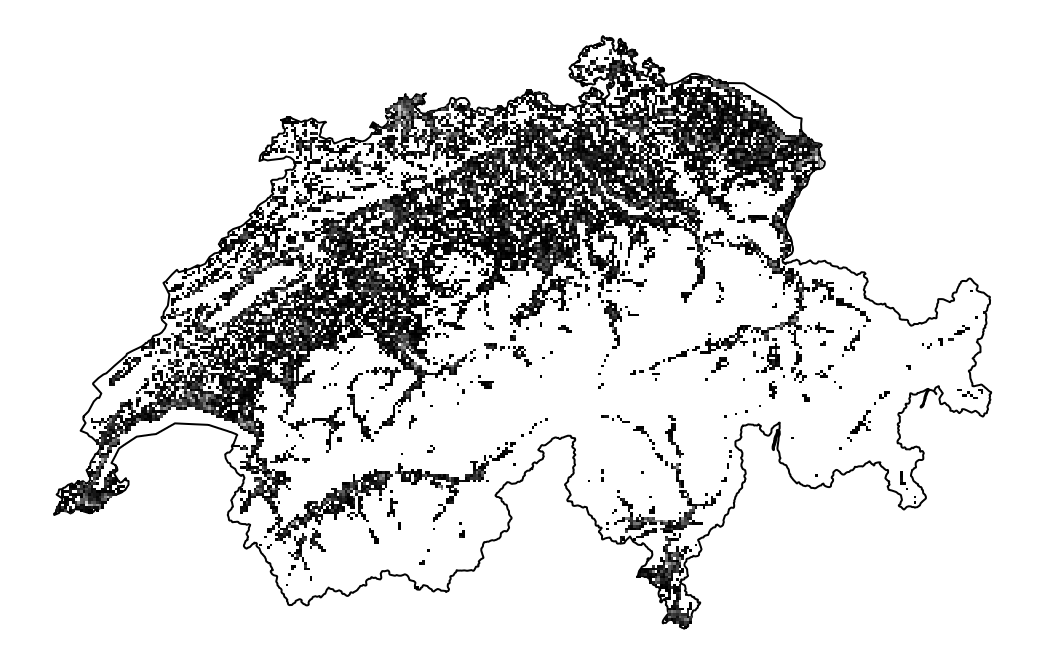

In [7]:
fig, ax = plt.subplots(figsize=(20, 12))

boundary.boundary.plot(ax = ax, zorder = 1, edgecolor = 'black', alpha=1, linewidth = 2)
a.plot(ax = ax, column = 'Ph_count', zorder = 2, cmap = 'Greys_r')

ax.axis('off')
plt.show()

In [8]:
stats = pd.read_csv('tables/stadistics.csv')
stats = stats.drop('Unnamed: 0', axis=1)

In [9]:
stats = stats.set_index(['Canton', 'District','Municipality', 'SubCategory'])

In [10]:
stats.query('SubCategory == "Photovoltaic"').sort_values('Count')

Count  TotalPower
Canton      District    Municipality SubCategory                    
Valais      Leuk        Agarn        Photovoltaic      1       16.20
            Goms        Binn         Photovoltaic      1        6.20
                        Fieschertal  Photovoltaic      1       95.94
                        Grafschaft   Photovoltaic      1        7.80
Solothurn   Bucheggberg Bibern       Photovoltaic      1       78.30
...                                                  ...         ...
Vaud        Lausanne    Lausanne     Photovoltaic    479    10105.66
Bern        Bern        Berne        Photovoltaic    483    14789.01
            Thun        Thun         Photovoltaic    519    14182.90
Basel-Stadt Basel       Basel        Photovoltaic    700    20787.69
Zürich      Winterthur  Winterthur   Photovoltaic    739    20384.21

[2658 rows x 2 columns]

In [11]:
data = gpd.read_file('tables/epp.geojson')

In [14]:
Winterthur = data.query('Municipality == "Winterthur" and SubCategory == "Photovoltaic"')
Winterthur = Winterthur.to_crs('epsg:4326')

mx = a3[a3.name_3 == 'Winterthur']

In [15]:
Winterthur.crs == mx.crs

True

In [16]:
from mpl_toolkits.axes_grid1.inset_locator import mark_inset, inset_axes

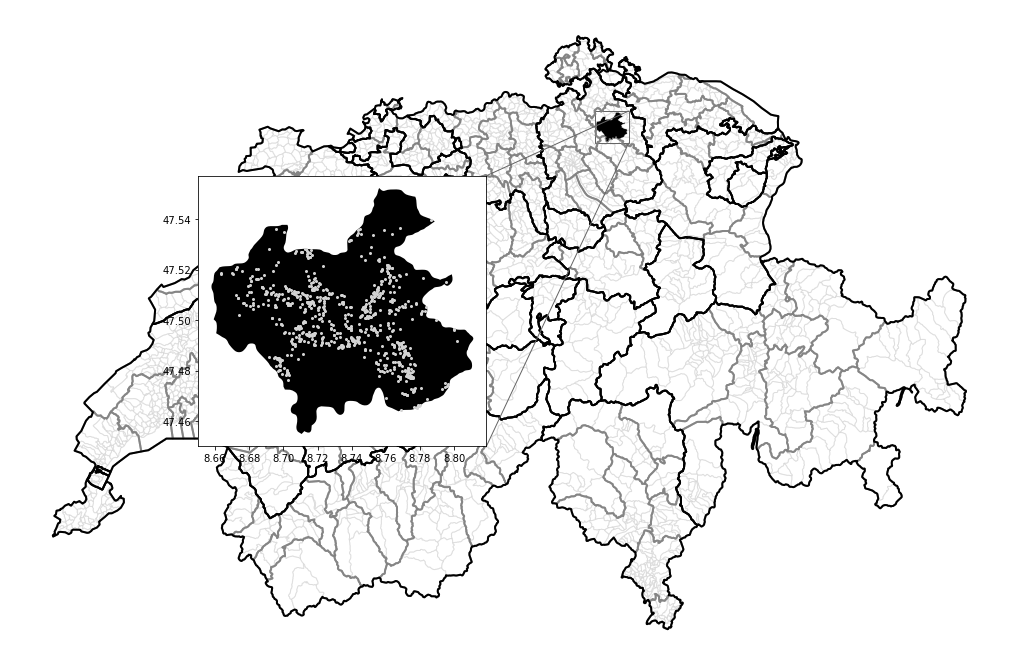

In [17]:
fig, ax = plt.subplots(figsize=(20, 12))

a1.boundary.plot(linewidth = 2, ax = ax, zorder =3, edgecolor = 'black', alpha=1)
a2.boundary.plot(linewidth = 2, ax = ax, zorder =2, edgecolor = 'gray', alpha=0.75)
a3.boundary.plot(linewidth = 1, ax = ax, zorder =1, edgecolor = 'lightgray', alpha=0.5)
mx.plot(ax = ax, zorder = 4, color = 'black')

axins = inset_axes(ax, 4, 4, loc = 1, bbox_to_anchor=(0.5, 0.7),
                   bbox_transform = ax.figure.transFigure)

mx.plot(ax = axins, zorder = 1, color = 'black')
Winterthur.plot(ax = axins, zorder = 2, color = 'lightgrey', markersize = 4)

mark_inset(ax, axins, loc1=1, loc2=4, fc="none", ec = "0.4")

ax.axis('off')
plt.show()

In [18]:
PV = data.query('SubCategory == "Photovoltaic"')

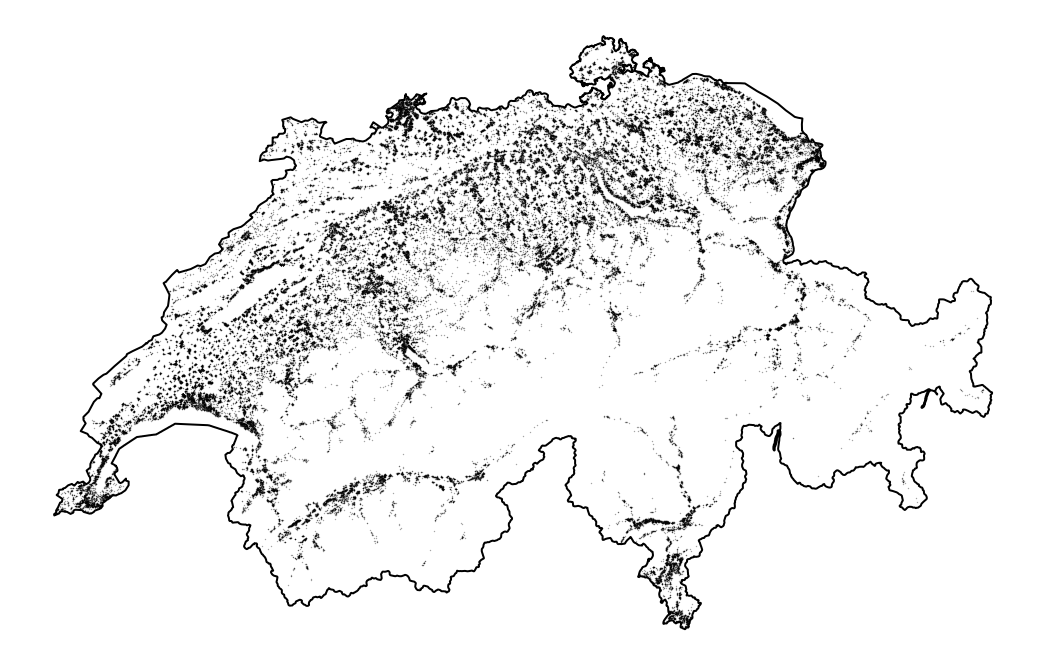

In [32]:
fig, ax = plt.subplots(figsize=(20, 12))

boundary.boundary.plot(ax = ax, zorder = 1, edgecolor = 'black', alpha=1, linewidth = 2)
PV.plot(markersize = 0.1, alpha= 0.5, color = 'black', ax = ax)

ax.axis('off')
plt.show()

In [74]:
cantons = gpd.read_file('tables/cantons.geojson')
gen_vau = cantons.query('Canton == "Vaud" or Canton== "Genève"')

In [89]:
gan_vau_reg = set(data.query('Canton == "Vaud" or Canton== "Genève"').CELLCODE)

In [101]:
gen_vau_km = a[a.CELLCODE.isin(gan_vau_reg)]
gen_vau_km.head(2)

,CELLCODE,Ph_count,Wi_count,Hy_count,Bi_count,Wa_count,Na_count,Nu_count,Cr_count,geometry
0,1kmE4009N2567,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"POLYGON ((4009000.000 2567000.000, 4009000.000..."
1,1kmE4009N2568,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"POLYGON ((4009000.000 2568000.000, 4009000.000..."


In [107]:
gen_vau_km.Ph_count.describe()

count    1565.000000
mean       10.481789
std        12.561631
min         1.000000
25%         2.000000
50%         5.000000
75%        14.000000
max        97.000000
Name: Ph_count, dtype: float64

In [168]:
gen_vau_km['Ph_density'] = pd.qcut(gen_vau_km['Ph_count'].copy(), q = 4, labels = False)
gen_vau_km.head()

,CELLCODE,Ph_count,Wi_count,Hy_count,Bi_count,Wa_count,Na_count,Nu_count,Cr_count,geometry,Ph_density
0,1kmE4009N2567,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"POLYGON ((4009000.000 2567000.000, 4009000.000...",2
1,1kmE4009N2568,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"POLYGON ((4009000.000 2568000.000, 4009000.000...",2
2,1kmE4010N2567,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"POLYGON ((4010000.000 2567000.000, 4010000.000...",0
3,1kmE4010N2568,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"POLYGON ((4010000.000 2568000.000, 4010000.000...",1
4,1kmE4010N2569,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"POLYGON ((4010000.000 2569000.000, 4010000.000...",0


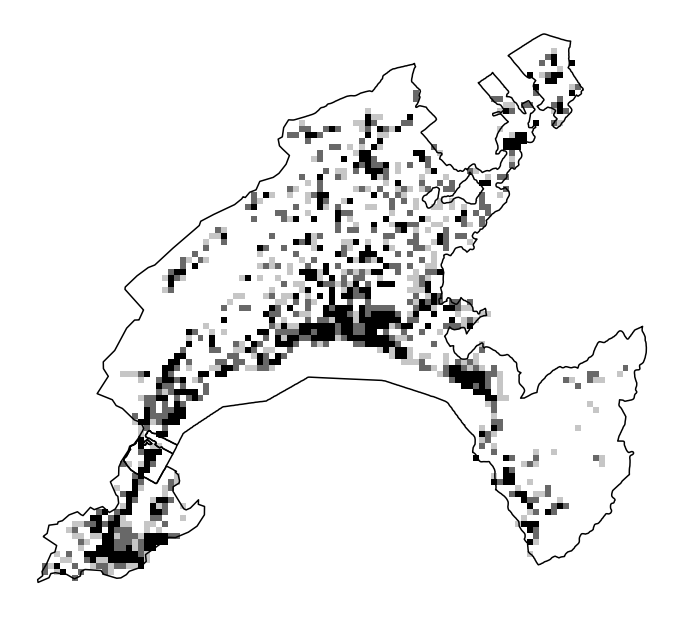

In [207]:
fig, ax = plt.subplots(figsize=(12, 12))

gen_vau.boundary.plot(edgecolor = 'black', ax = ax)
gen_vau_km.plot(ax=ax, column = 'Ph_density', cmap = 'Greys')

ax.axis('off')
plt.show()

In [3]:
df = pd.read_csv('dailymeans_se.csv')
df = df.drop('Unnamed: 0', axis=1)
df.tail(2)

,Station,station/location,WIGOS-ID,Data since,Station height m. a. sea level,CoordinatesE,CoordinatesN,Latitude,Longitude,Climate region,Canton,URL Previous years (verified data),URL Current year
27,Zürich / Fluntern,SMA,0-20000-0-06660,01.01.1864,556,2685118,1248066,47.377925,8.565742,North-eastern plateau,ZH,https://data.geo.admin.ch/ch.meteoschweiz.klim...,https://data.geo.admin.ch/ch.meteoschweiz.klim...
28,St. Gallen,STG,0-20000-0-06681,01.01.1864,776,2747866,1254588,47.425475,9.398528,North-eastern plateau,SG,https://data.geo.admin.ch/ch.meteoschweiz.klim...,https://data.geo.admin.ch/ch.meteoschweiz.klim...


In [210]:
# Creamos una columna de puntos geometricos (Objeto de GeoPandas)
from shapely.geometry import Point 
from pyproj import CRS

df['geometry'] = df.apply(lambda x: Point((x.Longitude, x.Latitude)),axis = 1)

In [213]:
df = gpd.GeoDataFrame(df, crs = CRS(4326), geometry = df.geometry)
df = df.to_crs(epsg =3035)

In [214]:
df = df[:29]

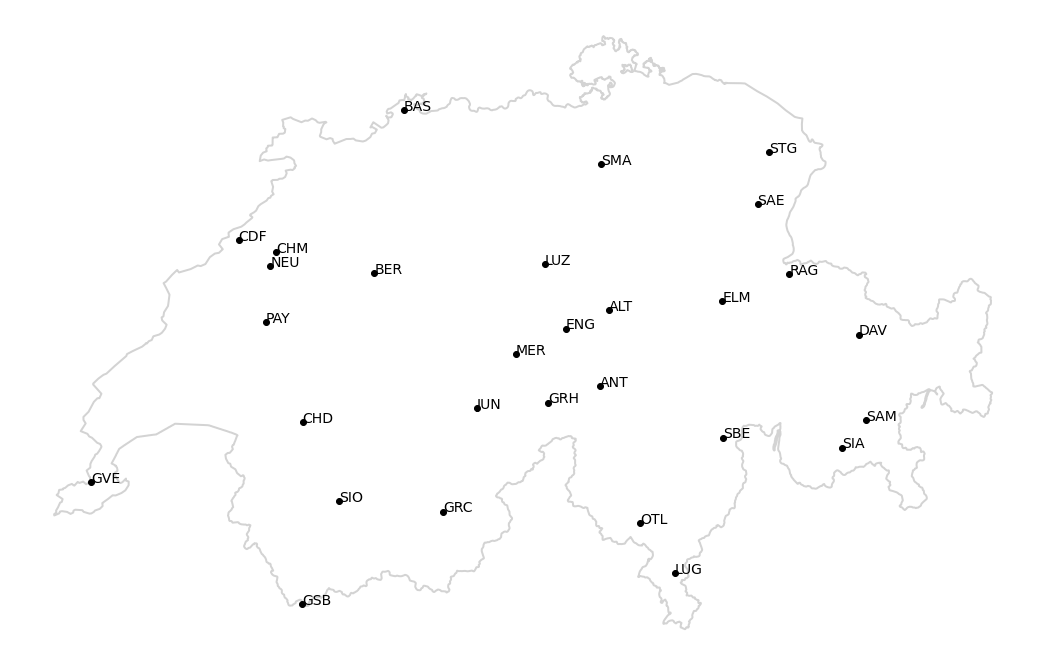

In [236]:
fig, ax = plt.subplots(figsize=(20, 12))

boundary.boundary.plot(ax = ax, zorder = 1, edgecolor = 'lightgrey', alpha=1, linewidth = 2)
df.plot(ax = ax, color ='black', marker='o')

for i in df.iterrows():
    plt.text(i[1][13].x, i[1][13].y, i[1][1], fontsize=14)
    
ax.axis('off')
plt.show()